<a href="https://colab.research.google.com/github/Lee34667/PortifolioProjects/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset object

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # automatically split into tetsing and training

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape # 60k images with 28 rows of 28 pixels each 

(60000, 28, 28)

In [8]:
train_images[0,23,23]  # let's have a look at one pixel
#Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

194

In [11]:
train_labels[:10]  # let's have a look at the first 10 training labels
#Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. 
#We'll create an array of label names to indicate which is which.

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

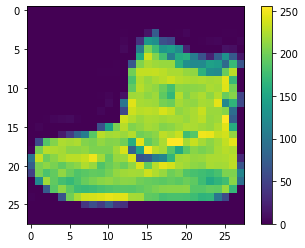

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
#now we want to scale down the output to a scale 0-1
train_images = train_images / 255.0

test_images = test_images / 255.0

In [19]:
model = keras.Sequential([# sequential basically means data going from left to right 
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1), flatten actually takes the 28x28 pixel and arrange them vertically in row of 784
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2), dense means all the previous neurons are connected to all of the next layer
    keras.layers.Dense(10, activation='softmax') # output layer (3), we have 10 because of the number of classes we have 
])

In [20]:
model.compile(optimizer='adam', #algorithm that performs the gradient descent 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs 
#we do not do the input function because Keras does it for us 

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5006 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3728 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3341 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3093 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2953 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2807 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2674 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2550 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2467 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) #verbose means how much printing to the console

print('Test accuracy:', test_acc) #checking for accuracy on our testing data
#we see that the accuracy is lower than that of the training set, which means overfitting 

313/313 [==============================] - 1s 2ms/step - loss: 0.3744 - accuracy: 0.8661
Test accuracy: 0.866100013256073


In [28]:
predictions = model.predict(test_images) #using the model to predict
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[3.88790340e-07 5.71094949e-10 3.24345595e-09 ... 4.19257432e-02
  7.97936934e-07 9.55389202e-01]
 [7.06232458e-05 6.57186870e-13 9.86011088e-01 ... 5.12025805e-16
  3.60139651e-09 3.07779019e-12]
 [5.41798029e-09 9.99999940e-01 3.29682635e-12 ... 2.07088669e-24
  4.43806945e-14 4.65926696e-19]
 ...
 [3.15010990e-03 6.47127005e-11 3.25323257e-04 ... 4.49237461e-07
  9.94106412e-01 8.01971961e-11]
 [1.09226335e-07 9.99983490e-01 2.03912720e-10 ... 2.27579330e-16
  1.90947116e-08 3.15971377e-14]
 [3.13720449e-07 2.89077007e-09 2.01556134e-07 ... 3.69650777e-04
  7.60828189e-05 6.10277539e-06]]


In [25]:
test_images.shape

(10000, 28, 28)

In [29]:
predictions[0]


array([3.8879034e-07, 5.7109495e-10, 3.2434559e-09, 9.8230934e-10,
       1.8089278e-07, 2.6800619e-03, 3.6347910e-06, 4.1925743e-02,
       7.9793693e-07, 9.5538920e-01], dtype=float32)

Trouser


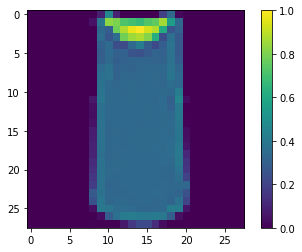

In [36]:
print(class_names[np.argmax(predictions[2])]) #checking the prediction of class and also the picture
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()


Pick a number: 2
1/1 [==============================] - 0s 18ms/step


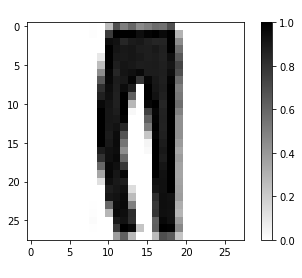

In [37]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
